<p style = "font-size : 50px; color : #000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff0000; border-radius: 5px 5px;"><strong>🍷 Red Wine Quality Analysis</strong></p>

Con el siguiente conjuntos de datos aplicaremos Algoritmos de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay vinos buenos o malos).

# Importing Libraries 

In [1]:

# For Data Manipulation
import pandas as pd
import numpy as np
import sklearn as s
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from itertools import cycle

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

#Bibliotecas para generar gráficos
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")

# Loading the dataset

In [2]:
wine = pd.read_csv('/content/drive/MyDrive/IA/winequality-red.csv')

<a id = '3.1'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Variable Description</strong></p>


<ol>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>fixed acidity : </strong> most acids involved with wine or fixed or nonvolatile (do not evaporate readily) </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>volatile acidity : </strong>the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>citric acid : </strong> found in small quantities, citric acid can add 'freshness' and flavor to wines</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>residual sugar : </strong>the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>chlorides : </strong> the amount of salt in the wine</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>free sulfur dioxide : </strong> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>total sulfur dioxide : </strong> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</p> </li>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>density : </strong>the density of water is close to that of water depending on the percent alcohol and sugar content </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>ph : </strong>  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>sulphates : </strong> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>alcohol sulfur dioxide : </strong> the percent alcohol content of the wine </p> </li>
            <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>quality : </strong> output variable (based on sensory data, score between 0 and 10)</p> </li>

![giphy.gif](https://media.giphy.com/media/ng6NcNAvohN6M/giphy.gif)

# Exploratory Data Analysis (EDA)

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Definir etiquetas de Bueno o malo





In [3]:
def convert_quali (quality):
    if quality <= 5:
        return 0
    else:
        return 1

Bueno = 1
Malo = 0

In [4]:
wine["quality_bin"] = wine["quality"].apply(convert_quali)

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
features = wine.columns[:-2]
output = wine.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
quality_bin


## Data Splitting

In [7]:
X = wine[features].values
y = wine[output].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12309, Testing size: 5280


In [9]:
X = wine.drop(["quality" ,"quality_bin"] , axis=1)
y = wine['quality_bin']


In [10]:
wine['quality_bin'].value_counts()

1    855
0    744
Name: quality_bin, dtype: int64

# Functions for Analysing Results

## Probability Output

In [20]:
def get_probabilty_output(X_test, model_fitted, value_count=10):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df


# **Decision tree**


In [26]:
#En "x" guardamos el resto. Con la función drop, eliminamos a "malware"
feature_cols = wine.columns.drop(["quality" ,"quality_bin"])


In [27]:
X = wine[feature_cols] # Features
y = wine['quality_bin'] # Target variable

In [28]:
#  Dividimos al conjunto de datos en entrenamiento y testeot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

##  Construimos el clasificador

In [29]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()

#Optimization Decision Tree
arbolDecision = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
arbolDecision = arbolDecision.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = arbolDecision.predict(X_test)

##  Métricas

In [30]:
 print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7166666666666667


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.2833333333333333


In [32]:
parameters_DT = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2')
}
model_DT = DecisionTreeClassifier()
model_DT_with_best_params = GridSearchCV(model_DT, parameters_DT)
model_DT_with_best_params.fit(X_train,y_train)
model_DT_best_params = model_DT_with_best_params.best_params_


In [33]:
get_probabilty_output(X_test=X_test, model_fitted=model_DT_with_best_params)

,0,1
0,100.000000,0.000000
1,0.000000,100.000000
2,0.000000,100.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,0.000000,100.000000
6,100.000000,0.000000
7,0.000000,100.000000
8,100.000000,0.000000
9,100.000000,0.000000


              precision    recall  f1-score   support

           0       0.70      0.69      0.70       226
           1       0.73      0.74      0.73       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Accuracy: 0.72


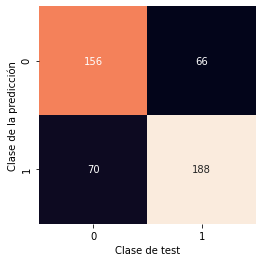

In [34]:
matrixDecision = confusion_matrix(y_test, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))

sns.heatmap(matrixDecision.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

##  Visualizando el árbol

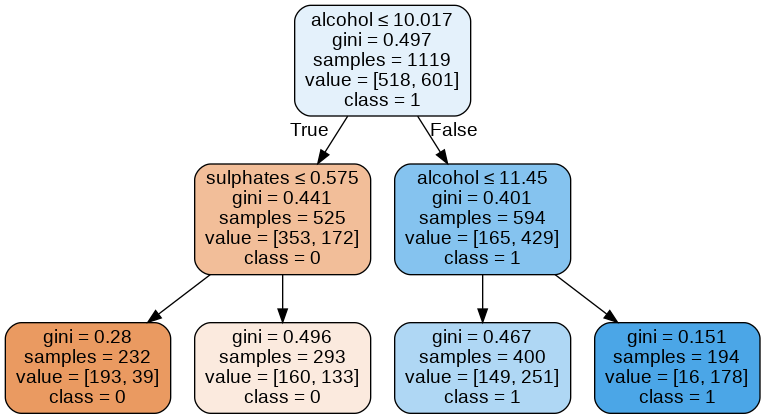

In [35]:
dot_data = StringIO()

export_graphviz(arbolDecision, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Wine.png')
Image(graph.create_png())

RESUMEN
- Accuracy: 0.7166666666666667 
- Mean Absolute Error: 0.2833333333333333 